# Exploratory Data Analysis Guide

## 2. Data Understanding

#### Datos ####
Los datos se encuentran en 3 archivos .csv flights.csv, hotels.csv y user.csv los cuales forman parte de viajes corporativos de una agencia a traves de Brasil.
#### Hipótesis Planteadas

**H1) Comportamiento/Tendencia de clientes:** <br>
- Días/Meses de mayor demanda.
- Clase de vuelo
- Ciudades con mayor demanda
- Cantidad de días<br>

**H2)**<br> 
**1.Dependencia  de Precios de Vuelos y Hoteles**<br> 
**2.Dependencia de Distancia y Precio de Vuelos**



In [2]:
# Importamos las librerias a utilizar
## PYTHON ##
import pandas as pd
import numpy as np
import datetime
import statistics

# Para que me muestre los datos completos y no salgan cortados
# le indico que ancho de las columnas
pd.options.display.max_colwidth = None  #con None es para todos los caracteres posibles

## VISUALIZACIONES ##
import matplotlib.pyplot as plt
import seaborn as sns

----

# 1° Dataset: FLIGHTS

8) **Exploratorio Inicial**

Primero cargamos los datos a formato DataFrame:
Importamos los datos de los datasets .csv a formato DataFrame

In [3]:
# Primer dataset Flights
# Lectura del ficheros
df_flights = pd.read_csv("C:/Users/Santiago/Desktop/EDA Riccardi Santiago/src/data/flights.csv")
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [4]:
# Analizamos como estan compuestos los datos y los tipos de variables
df_flights.sample(5)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
95032,47516,461,Campo Grande (MS),Aracaju (SE),firstClass,1473.41,1.69,650.10,FlyingDrops,06/11/2020
221885,110942,1100,Brasilia (DF),Florianopolis (SC),firstClass,1576.97,1.66,637.56,Rainbow,10/16/2020
132580,66290,642,Campo Grande (MS),Sao Paulo (SP),premium,536.98,0.44,168.22,CloudFy,10/06/2022
4768,2384,21,Aracaju (SE),Florianopolis (SC),firstClass,1515.79,2.10,808.85,CloudFy,06/24/2021
152832,76416,744,Sao Paulo (SP),Salvador (BH),premium,1118.61,1.04,401.66,CloudFy,01/16/2020


Verificamos la calidad de los datos, analizando n° de columnas, tipo de dato, datos nulos

In [5]:
# De que tipo son los datos
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [6]:
# Cantidad de filas y columnas
print(f'df_flights contiene --> filas:{df_flights.shape[0]} y columnas:{df_flights.shape[1]}')

df_flights contiene --> filas:271888 y columnas:10


9) **Tabla de Variables**

In [7]:
# Analisis estadistico de las variables
df_flights.describe(include="all")

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
count,271888.000000,271888.000000,271888,271888,271888,271888.00000,271888.000000,271888.000000,271888,271888
unique,NaN,NaN,9,9,3,NaN,NaN,NaN,3,999
top,NaN,NaN,Florianopolis (SC),Florianopolis (SC),firstClass,NaN,NaN,NaN,Rainbow,09/26/2019
freq,NaN,NaN,57317,57317,116418,NaN,NaN,NaN,116752,1335
mean,67971.500000,667.505495,NaN,NaN,NaN,957.37503,1.421147,546.955535,NaN,NaN
std,39243.724665,389.523127,NaN,NaN,NaN,362.31189,0.542541,208.851288,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,301.51000,0.440000,168.220000,NaN,NaN
25%,33985.750000,326.000000,NaN,NaN,NaN,672.66000,1.040000,401.660000,NaN,NaN
50%,67971.500000,659.000000,NaN,NaN,NaN,904.00000,1.460000,562.140000,NaN,NaN
75%,101957.250000,1011.000000,NaN,NaN,NaN,1222.24000,1.760000,676.530000,NaN,NaN


Descripción de las variables:
* **travelCode**: analizar en profundidad
* **userCode**: analizar en profundidad
* **from**: hay un total de 9 ciudades
* **to**: hay un total de 9 ciudades
* **flightType**: tenemos 3 tipos de clases de vuelo: ['firstClass', 'economic', 'premium']
* **price**: R$ (real brasileño) el max valor de un pasaje fue de R$ 1754.17 y el min valor fue de R$ 301.51
* **time**: aunque esta en formato float representa el tiempo en horas,minutos 
* **distance**: su unidad es en km
* **agency**: tenemos 3 aerolineas: ['FlyingDrops', 'CloudFy', 'Rainbow']
* **date**: cambiar el formato y analizar

In [8]:
# Analizamos desde que rango de fecha son los datos:
print(f'Inicio: {pd.to_datetime(df_flights["date"]).min()}')
print(f'Fin: {pd.to_datetime(df_flights["date"]).max()}')

Inicio: 2019-09-26 00:00:00
Fin: 2023-07-24 00:00:00


In [9]:
# Analizamos que relacion tienen las variables 'travelCode' y 'userCode':
df_flights.groupby(['travelCode', 'userCode']).size()

travelCode  userCode
0           0           2
1           0           2
2           0           2
3           0           2
4           0           2
                       ..
135939      1339        2
135940      1339        2
135941      1339        2
135942      1339        2
135943      1339        2
Length: 135944, dtype: int64

In [10]:
travelCode_userCode = pd.DataFrame(df_flights.groupby(['travelCode','userCode']).size(),columns=['N° user Code x travelCode'])
travelCode_userCode

,,N° user Code x travelCode
travelCode,userCode,
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
135939,1339,2
135940,1339,2
135941,1339,2


In [11]:
travelCode_userCode = pd.DataFrame([df_flights.groupby(['travelCode', 'userCode']).size().max(),df_flights.groupby(['travelCode', 'userCode']).size().min()],columns=["N° user Code x travelCode"],index=['Max userCode','Min userCode'])
travelCode_userCode 

,N° user Code x travelCode
Max userCode,2
Min userCode,2


Observaciones: Cada travelCode siempre esta asociado con 2 userCode lo cual indica que todos los viajes son de ida y vuelta.

In [12]:
# N° de Aerolineas
aerolineas=list(df_flights["agency"].unique())
print(aerolineas)

['FlyingDrops', 'CloudFy', 'Rainbow']


In [13]:
# N° de FlightType
flight_type = list(df_flights["flightType"].unique())
print(flight_type) 

['firstClass', 'economic', 'premium']


In [14]:
# N° de Ciudades (con to o from)
ciudades = list(df_flights["from"].unique())
print(ciudades)

['Recife (PE)', 'Florianopolis (SC)', 'Brasilia (DF)', 'Aracaju (SE)', 'Salvador (BH)', 'Campo Grande (MS)', 'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)']


C:\Users\Santiago\AppData\Local\Temp\ipykernel_8460\3153855133.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flights.corr(), annot=True)


<AxesSubplot: >

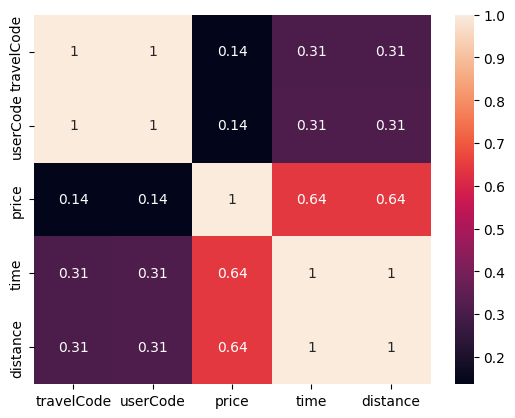

In [15]:
# Heatmap/Mapa de Correlación
sns.heatmap(df_flights.corr(), annot=True)

### 3. Data Cleaning

**Missings/Valores nulos**

In [16]:
df_flights.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [17]:
df_flights.isna().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

Observaciones: no hay datos nulos 

**Outliers** <br>
Histogramas

<AxesSubplot: xlabel='price', ylabel='Count'>

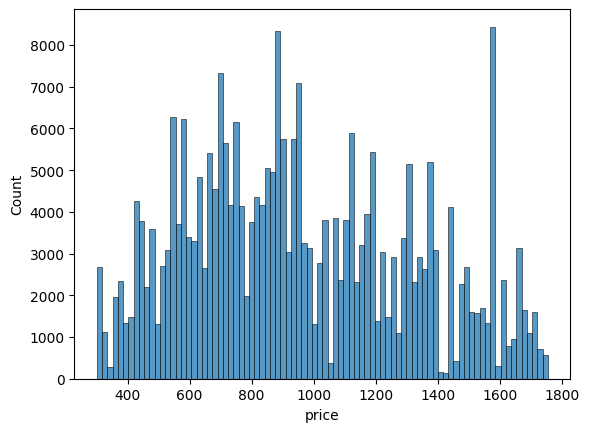

In [18]:
sns.histplot(data=df_flights, x='price')

Densidad

C:\Users\Santiago\AppData\Local\Temp\ipykernel_8460\175360050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_flights["price"], hist = False);


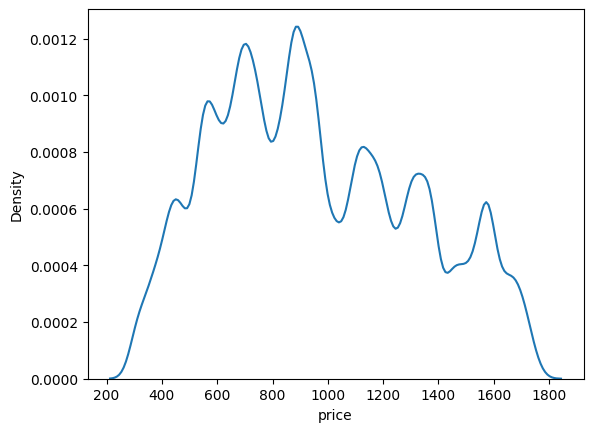

In [19]:
sns.distplot(df_flights["price"], hist = False);

Boxsplots

c:\Users\Santiago\miniconda3\envs\rampup_py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


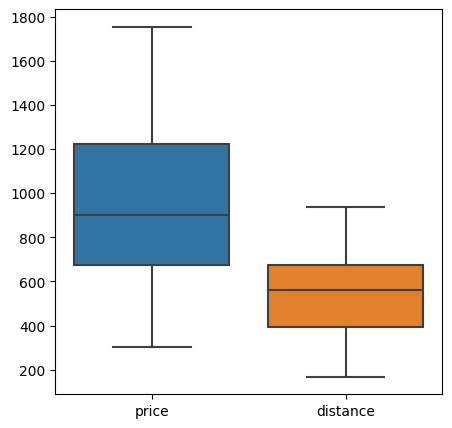

In [100]:
flights_copy = df_flights
flights_copy["log_travelCode"]=np.log(flights_copy["travelCode"])
plt.figure(figsize=(5,5))
sns.boxplot(data=flights_copy[['price','distance']]);	

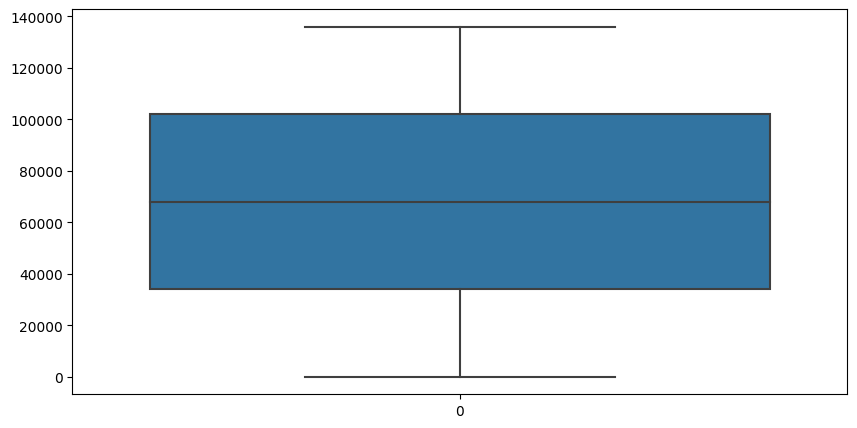

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(df_flights["travelCode"]);

**Transformaciones**

In [22]:
# Creamos columna year-month-day" para leer y manipular la fecha:
df_flights["year-month-day"] = pd.to_datetime(df_flights["date"])
# Para obtener el año y mes
df_flights['year-month'] = pd.to_datetime(df_flights['year-month-day']).dt.to_period('M')

# Para obtener el año
df_flights['year'] = pd.to_datetime(df_flights['year-month-day']).dt.year

# Para obtener el mes
df_flights['month'] = pd.to_datetime(df_flights['year-month-day']).dt.month

# Para obtener el dia
#df_flights['day'] = pd.to_datetime(df_flights['year-month-day']).dt.day

In [23]:
# Ordenamos el DF por fecha 
df_flights.sort_values(by=['year-month-day'])

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,log_travelCode,year-month-day,year-month,year,month
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,-inf,2019-09-26,2019-09,2019,9
242276,121138,1202,Florianopolis (SC),Natal (RN),firstClass,1315.27,1.84,709.37,CloudFy,09/26/2019,11.704686,2019-09-26,2019-09,2019,9
264152,132076,1301,Florianopolis (SC),Salvador (BH),premium,1311.38,2.44,937.77,CloudFy,09/26/2019,11.791133,2019-09-26,2019-09,2019,9
57808,28904,276,Recife (PE),Rio de Janeiro (RJ),economic,908.93,2.30,885.57,Rainbow,09/26/2019,10.271735,2019-09-26,2019-09,2019,9
177390,88695,877,Aracaju (SE),Natal (RN),firstClass,598.61,0.46,176.33,CloudFy,09/26/2019,11.392959,2019-09-26,2019-09,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158103,79051,766,Brasilia (DF),Natal (RN),firstClass,1434.91,1.43,550.69,Rainbow,07/21/2023,11.277848,2023-07-21,2023-07,2023,7
86565,43282,422,Rio de Janeiro (RJ),Aracaju (SE),firstClass,1381.55,1.55,597.61,FlyingDrops,07/21/2023,10.675492,2023-07-21,2023-07,2023,7
187725,93862,925,Salvador (BH),Florianopolis (SC),firstClass,1616.44,2.44,937.77,FlyingDrops,07/23/2023,11.449581,2023-07-23,2023-07,2023,7
117319,58659,571,Recife (PE),Campo Grande (MS),premium,793.15,1.39,535.40,CloudFy,07/24/2023,10.979496,2023-07-24,2023-07,2023,7


In [24]:
# Tomamos un rango de fechas para hacer el analisis: 2019-09-26 hasta 2021-09-26
df_flights = df_flights.loc[(df_flights['year-month'] >= '2019-09') & (df_flights['year-month'] <= '2021-09')]
# Ordenamos el DF por fecha: de menor a mayor 
df_flights  = df_flights.sort_values(by=['year-month-day'])
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,log_travelCode,year-month-day,year-month,year,month
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,-inf,2019-09-26,2019-09,2019,9
204004,102002,1012,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,09/26/2019,11.532748,2019-09-26,2019-09,2019,9
203676,101838,1011,Florianopolis (SC),Salvador (BH),economic,898.67,2.44,937.77,CloudFy,09/26/2019,11.531139,2019-09-26,2019-09,2019,9
203610,101805,1010,Florianopolis (SC),Aracaju (SE),firstClass,1582.10,2.10,808.85,Rainbow,09/26/2019,11.530814,2019-09-26,2019-09,2019,9
203296,101648,1009,Florianopolis (SC),Natal (RN),firstClass,1315.27,1.84,709.37,CloudFy,09/26/2019,11.529271,2019-09-26,2019-09,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215514,107757,1069,Florianopolis (SC),Brasilia (DF),firstClass,1087.18,1.66,637.56,Rainbow,09/30/2021,11.587634,2021-09-30,2021-09,2021,9
130128,65064,633,Campo Grande (MS),Aracaju (SE),firstClass,1473.41,1.69,650.10,FlyingDrops,09/30/2021,11.083127,2021-09-30,2021-09,2021,9
117130,58565,571,Campo Grande (MS),Sao Paulo (SP),firstClass,684.65,0.44,168.22,FlyingDrops,09/30/2021,10.977893,2021-09-30,2021-09,2021,9
259738,129869,1279,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,09/30/2021,11.774282,2021-09-30,2021-09,2021,9


In [25]:
# Creamos una columna con el nombre del dia de la semana
df_flights["day_of_week"] =df_flights["year-month-day"].dt.day_name()
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,log_travelCode,year-month-day,year-month,year,month,day_of_week
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,-inf,2019-09-26,2019-09,2019,9,Thursday
204004,102002,1012,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,09/26/2019,11.532748,2019-09-26,2019-09,2019,9,Thursday
203676,101838,1011,Florianopolis (SC),Salvador (BH),economic,898.67,2.44,937.77,CloudFy,09/26/2019,11.531139,2019-09-26,2019-09,2019,9,Thursday
203610,101805,1010,Florianopolis (SC),Aracaju (SE),firstClass,1582.10,2.10,808.85,Rainbow,09/26/2019,11.530814,2019-09-26,2019-09,2019,9,Thursday
203296,101648,1009,Florianopolis (SC),Natal (RN),firstClass,1315.27,1.84,709.37,CloudFy,09/26/2019,11.529271,2019-09-26,2019-09,2019,9,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215514,107757,1069,Florianopolis (SC),Brasilia (DF),firstClass,1087.18,1.66,637.56,Rainbow,09/30/2021,11.587634,2021-09-30,2021-09,2021,9,Thursday
130128,65064,633,Campo Grande (MS),Aracaju (SE),firstClass,1473.41,1.69,650.10,FlyingDrops,09/30/2021,11.083127,2021-09-30,2021-09,2021,9,Thursday
117130,58565,571,Campo Grande (MS),Sao Paulo (SP),firstClass,684.65,0.44,168.22,FlyingDrops,09/30/2021,10.977893,2021-09-30,2021-09,2021,9,Thursday
259738,129869,1279,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,09/30/2021,11.774282,2021-09-30,2021-09,2021,9,Thursday


In [26]:
df_flights.day_of_week.unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'], dtype=object)

----

# 2° Dataset: HOTELS

In [27]:
# Lectura del fichero
df_hotels = pd.read_csv("C:/Users/Santiago/Desktop/EDA/hotels.csv")
df_hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [28]:
# Analizamos desde que rango de fecha son los datos:
print(f'Inicio: {pd.to_datetime(df_hotels["date"]).min()}')
print(f'Fin: {pd.to_datetime(df_hotels["date"]).max()}')

Inicio: 2019-09-26 00:00:00
Fin: 2023-07-13 00:00:00


Observaciones: selecciono un rango de fechas para realizar el analisis. El mismo para flights

In [29]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [30]:
df_hotels.describe(include='all')

,travelCode,userCode,name,place,days,price,total,date
count,40552.000000,40552.000000,40552,40552,40552.000000,40552.000000,40552.000000,40552
unique,NaN,NaN,9,9,NaN,NaN,NaN,199
top,NaN,NaN,Hotel K,Salvador (BH),NaN,NaN,NaN,10/31/2019
freq,NaN,NaN,5094,5094,NaN,NaN,NaN,404
mean,67911.794461,666.963726,NaN,NaN,2.499679,214.439554,536.229513,NaN
std,39408.199333,391.136794,NaN,NaN,1.119326,76.742305,319.331482,NaN
min,0.000000,0.000000,NaN,NaN,1.000000,60.390000,60.390000,NaN
25%,33696.750000,323.000000,NaN,NaN,1.000000,165.990000,247.620000,NaN
50%,67831.000000,658.000000,NaN,NaN,2.000000,242.880000,495.240000,NaN
75%,102211.250000,1013.000000,NaN,NaN,4.000000,263.410000,742.860000,NaN


Descripción de las variables:
* **travelCode** (v.numérica): userCode es unico para cada cliente
* **userCode** (v.categórica): 5 tipos de companias de viaje
* **name**: notamos que hay 9 tipos de hoteles
* **place** (v.categórica): notamos que hay 9 tipos de ciudades
* **days** (v.numérica): 
* **price**(v.numérica): precio/dia
* **total**(v.numérica): precio total = precio*dias
* **date**(v.numérica): 

In [31]:
df_hotels['name'].unique()

array(['Hotel A', 'Hotel K', 'Hotel BD', 'Hotel Z', 'Hotel AU',
       'Hotel AF', 'Hotel BW', 'Hotel CB', 'Hotel BP'], dtype=object)

In [32]:
df_hotels['days'].unique()

array([4, 2, 3, 1], dtype=int64)

In [33]:
df_hotels['userCode'].unique().size

1310

C:\Users\Santiago\AppData\Local\Temp\ipykernel_8460\4167446034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hotels.corr(), annot=True)


<AxesSubplot: >

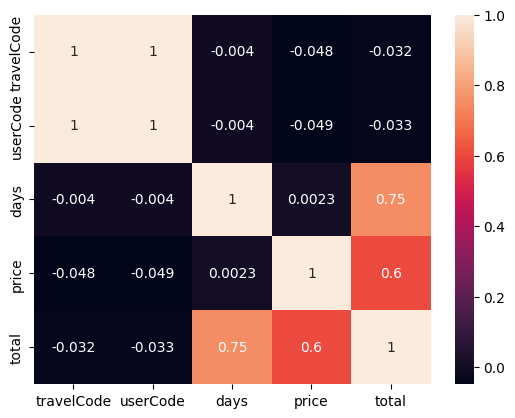

In [34]:
# Heatmap/Mapa de Correlación
sns.heatmap(df_hotels.corr(), annot=True)

### 3. Data Cleaning

**Missings/Valores nulos**

In [35]:
df_hotels.isna().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [36]:
df_hotels.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [37]:
df_hotels.days.value_counts()

1    10171
4    10163
2    10110
3    10108
Name: days, dtype: int64

In [38]:
df_hotels.place.value_counts()

Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Brasilia (DF)          4437
Campo Grande (MS)      4333
Aracaju (SE)           4205
Florianopolis (SC)     3330
Name: place, dtype: int64

In [39]:
df_hotels.name.value_counts()

Hotel K     5094
Hotel CB    5029
Hotel BD    4829
Hotel AF    4828
Hotel AU    4467
Hotel BP    4437
Hotel BW    4333
Hotel Z     4205
Hotel A     3330
Name: name, dtype: int64

In [40]:
df_hotels.groupby(['name', 'place']).size()

name      place              
Hotel A   Florianopolis (SC)     3330
Hotel AF  Sao Paulo (SP)         4828
Hotel AU  Recife (PE)            4467
Hotel BD  Natal (RN)             4829
Hotel BP  Brasilia (DF)          4437
Hotel BW  Campo Grande (MS)      4333
Hotel CB  Rio de Janeiro (RJ)    5029
Hotel K   Salvador (BH)          5094
Hotel Z   Aracaju (SE)           4205
dtype: int64

**Outliers**

Barplot

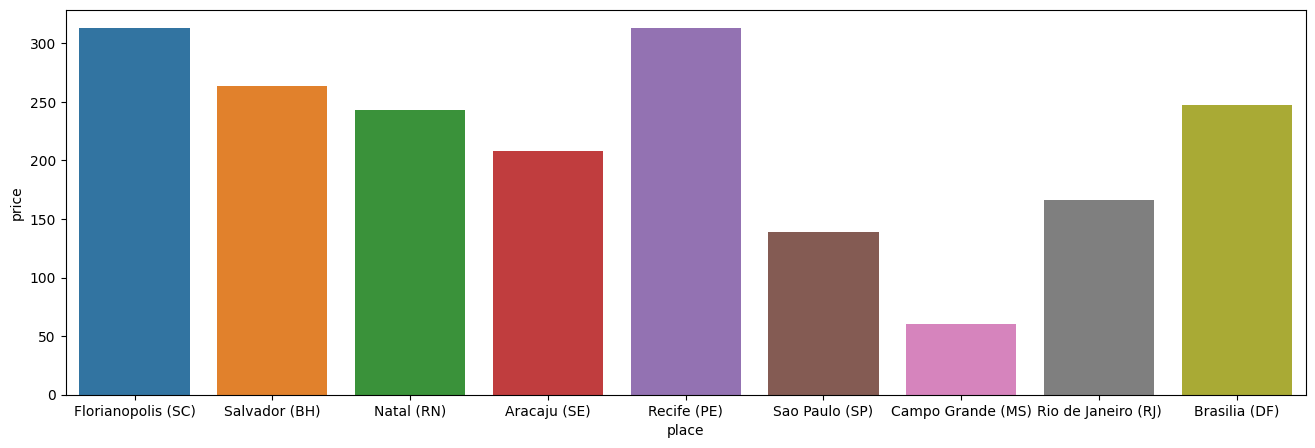

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(data=df_hotels,x='place',y='price');
#agregar titulo

Histogramas

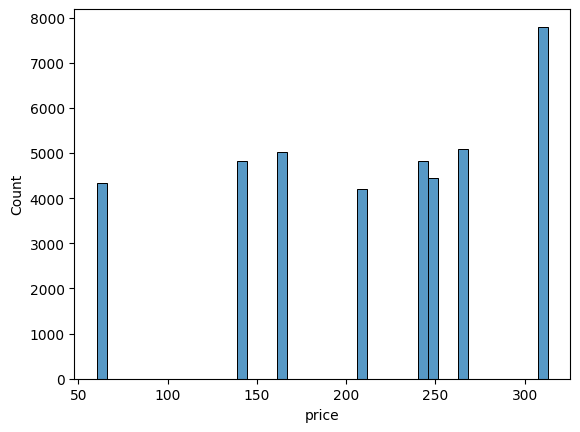

In [42]:
sns.histplot(data=df_hotels, x='price');

Densidad

C:\Users\Santiago\AppData\Local\Temp\ipykernel_8460\1853512011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hotels["price"], hist = False);


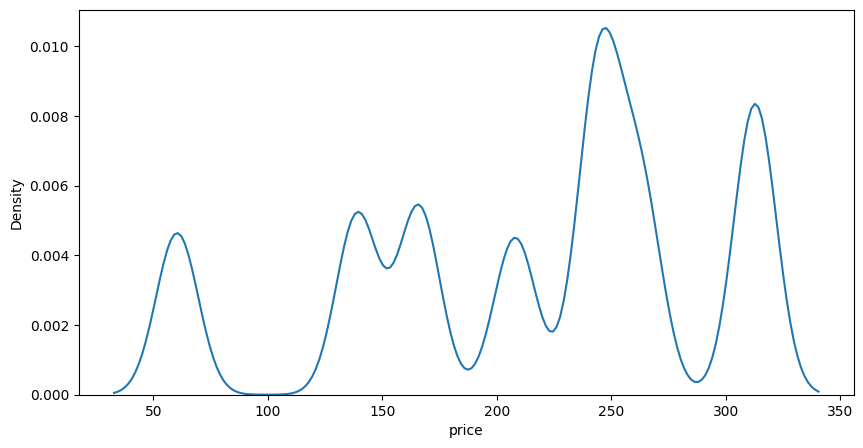

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df_hotels["price"], hist = False);

Boxplots

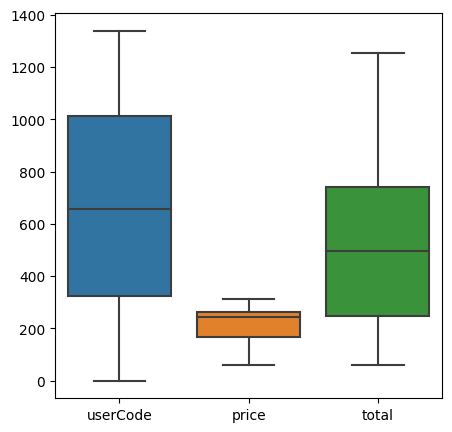

In [44]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_hotels[['userCode','price','total']]);

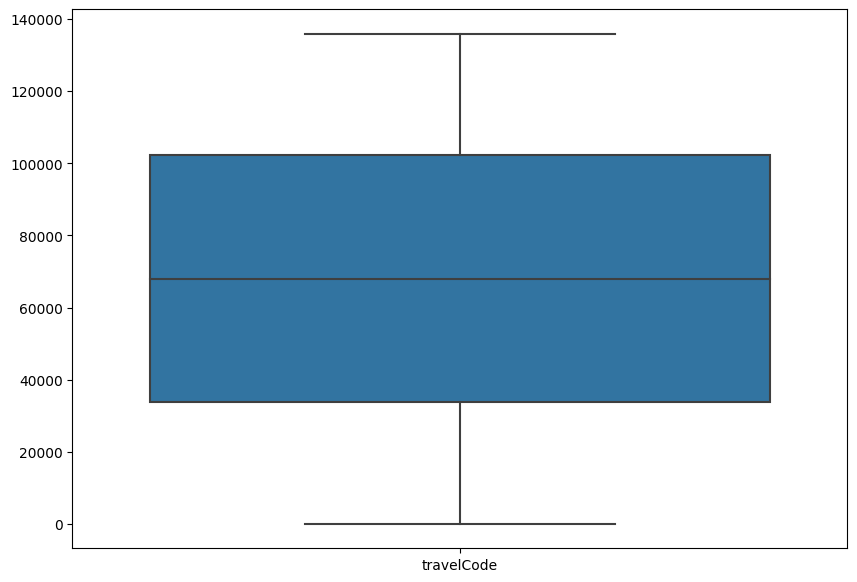

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_hotels[['travelCode']]);

**Transformaciones**

In [46]:
# Agregamos columna 'year-month-day' para leer y manipular la fecha:
df_hotels["year-month-day"] = pd.to_datetime(df_hotels["date"])
# Agregamos columna del el year-month
df_hotels['year-month'] = pd.to_datetime(df_hotels['year-month-day']).dt.to_period('M')
# Agregamos columna del el mes
df_hotels['month'] = pd.to_datetime(df_hotels['year-month-day']).dt.month
# Agregamos columna del año
df_hotels['year'] = pd.to_datetime(df_hotels['year-month-day']).dt.year

In [47]:
# Tomamos un rango de fechas para hacer el analisis: 2019-09-26 hasta 2021-09-26
df_hotels = df_hotels.loc[(df_hotels['year-month'] >= '2019-09') & (df_hotels['year-month'] <= '2021-09')]
# Ordenamos el DF por fecha: de menor a mayor 
df_hotels  = df_hotels.sort_values(by=['year-month-day'])
df_hotels

,travelCode,userCode,name,place,days,price,total,date,year-month-day,year-month,month,year
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,2019-09-26,2019-09,9,2019
25502,85700,844,Hotel AU,Recife (PE),2,312.83,625.66,09/26/2019,2019-09-26,2019-09,9,2019
14124,46829,455,Hotel BD,Natal (RN),3,242.88,728.64,09/26/2019,2019-09-26,2019-09,9,2019
32456,109069,1082,Hotel Z,Aracaju (SE),4,208.04,832.16,09/26/2019,2019-09-26,2019-09,9,2019
32546,109367,1084,Hotel AU,Recife (PE),2,312.83,625.66,09/26/2019,2019-09-26,2019-09,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
31628,106361,1056,Hotel BD,Natal (RN),4,242.88,971.52,09/30/2021,2021-09-30,2021-09,9,2021
8271,27320,262,Hotel CB,Rio de Janeiro (RJ),3,165.99,497.97,09/30/2021,2021-09-30,2021-09,9,2021
8236,27201,261,Hotel BD,Natal (RN),2,242.88,485.76,09/30/2021,2021-09-30,2021-09,9,2021
31943,107487,1066,Hotel CB,Rio de Janeiro (RJ),3,165.99,497.97,09/30/2021,2021-09-30,2021-09,9,2021


In [48]:
df_hotels['userCode'].unique().size

1310

----

# 3° Dataset: USERS

In [49]:
# Lectura del fichero
df_users = pd.read_csv("C:/Users/Santiago/Desktop/EDA/users.csv")
df_users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [50]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [51]:
# Cantidad de filas y columnas
print(f'df_flights contiene --> filas:{df_users.shape[0]} y columnas:{df_users.shape[1]}')

df_flights contiene --> filas:1340 y columnas:5


In [52]:
# Analisis estadistico de las variables
df_users.describe(include="all")

,code,company,name,gender,age
count,1340.000000,1340,1340,1340,1340.000000
unique,NaN,5,1338,3,NaN
top,NaN,4You,Charlotte Johnson,male,NaN
freq,NaN,453,2,452,NaN
mean,669.500000,NaN,NaN,NaN,42.742537
std,386.968991,NaN,NaN,NaN,12.869779
min,0.000000,NaN,NaN,NaN,21.000000
25%,334.750000,NaN,NaN,NaN,32.000000
50%,669.500000,NaN,NaN,NaN,42.000000
75%,1004.250000,NaN,NaN,NaN,54.000000


Descripción de las variables:
* **code** (v.numérica): userCode es unico para cada cliente
* **company** (v.categórica): 5 tipos de companias de viaje
* **name**: str
* **gender** (v.categórica): notamos que hay 3 tipos de sexo, lo cual indica que hay algun error que analizar
* **age** (v.numérica): el min es 21 y el max es 65, el rango es coherente

In [53]:
# Analizamos cuantos clientes hay
df_users['code'].unique().size

1340

Observaciones: cada userCode es unico e indica que hay 1340 clientes

C:\Users\Santiago\AppData\Local\Temp\ipykernel_8460\172591438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_users.corr(), annot=True)


<AxesSubplot: >

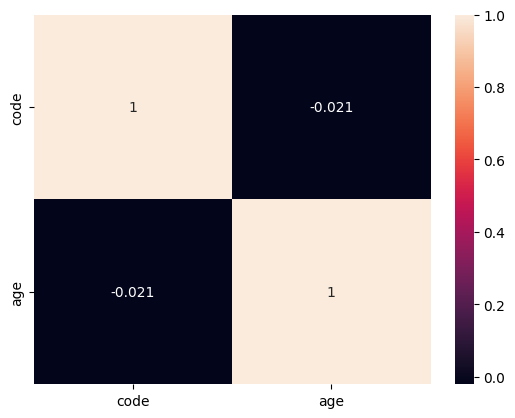

In [54]:
# Heatmap/Mapa de Correlación
sns.heatmap(df_users.corr(), annot=True)

Observaciones: no hay relaciones entre las variables

### 3. Data Cleaning

**Missings/Valores nulos**

In [55]:
df_users.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [56]:
df_users.isna().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [57]:
df_users.gender.unique()

array(['male', 'female', 'none'], dtype=object)

In [58]:
# Analizamos los % de gender para realizar inputaciones o eliminar registros 
gender = pd.DataFrame(df_users.groupby('gender').size(),columns=['cantidad']).sort_values(by="cantidad",ascending=False)
gender['%']=round(452*100/1340,2),round(448*100/1340,2),round(440*100/1340,2)
gender

,cantidad,%
gender,,
male,452,33.73
female,448,33.43
none,440,32.84


Observaciones: El 33% tiene valor none (bajo porcentaje para ser eliminado). Como el % de male y female es casi el mismo, inputamos los valores none equitativamente a male y female.

In [59]:
# Inputamos los valores none a male y female
df_users['gender'] = df_users['gender'].replace(to_replace='none', value=['male','female'],method='bfill')

In [60]:
# Corroboramos que la inputacion se realizo correctamente
df_users.gender.value_counts()

female    687
male      653
Name: gender, dtype: int64

**Outliers**

Boxsplots

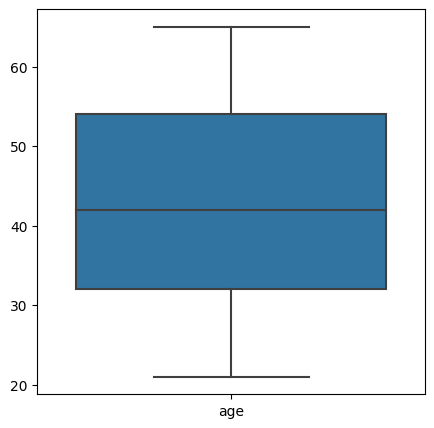

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_users[['age']]);

**Transformaciones**

No se realizo ninguna transformacion

----

### 4. Analysis <br>


**1. Análisis univariante**

FLIGHTS

In [62]:
# Que aerolinea es la mas demandada
vuelos_x_agencia = pd.DataFrame(df_flights.groupby("agency").size(),columns=['count']).sort_values(by="count",ascending=False)
vuelos_x_agencia.reset_index(inplace=True)
vuelos_x_agencia

,agency,count
0,Rainbow,89443
1,CloudFy,89049
2,FlyingDrops,29505


Barplot

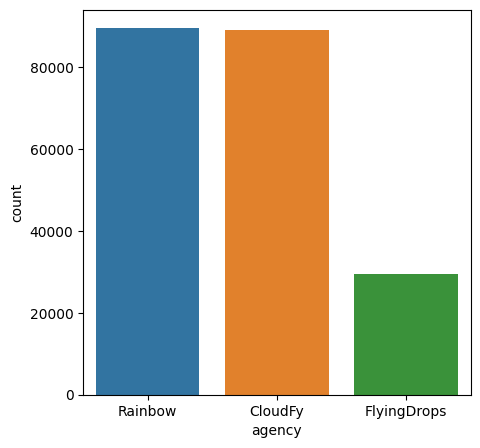

In [63]:
plt.figure(figsize=(5,5))
sns.barplot(data=vuelos_x_agencia,x='agency',y='count');

**Clase/FlightType mas demandado**

In [64]:
# Que flightType es el mas demandado
flight_type = pd.DataFrame(df_flights.groupby("flightType").size(),columns=['count']).sort_values(by="count",ascending=False)
flight_type.reset_index(inplace=True)
flight_type

,flightType,count
0,firstClass,88803
1,premium,59861
2,economic,59333


Barplot

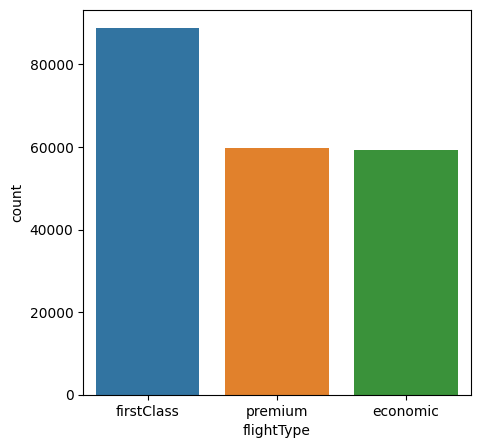

In [65]:
plt.figure(figsize=(5,5))
sns.barplot(data=flight_type,x='flightType',y='count');

Donut Chart

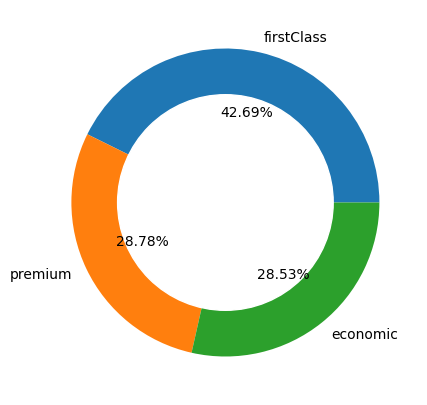

In [66]:
data = df_flights["flightType"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

plt.figure(figsize=(5,5))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')

p=plt.gcf()
p.gca().add_artist(my_circle);

**Dia de la semana mas demandado**

In [67]:
# Analizamos que dia de la semana es el mas elegido para viajar
day = pd.DataFrame(df_flights.groupby("day_of_week").size(),columns=['count']).sort_values(by="count",ascending=False)
day.reset_index(inplace=True)
day

,day_of_week,count
0,Thursday,104315
1,Sunday,26017
2,Monday,25999
3,Saturday,25853
4,Friday,25813


Boxplot

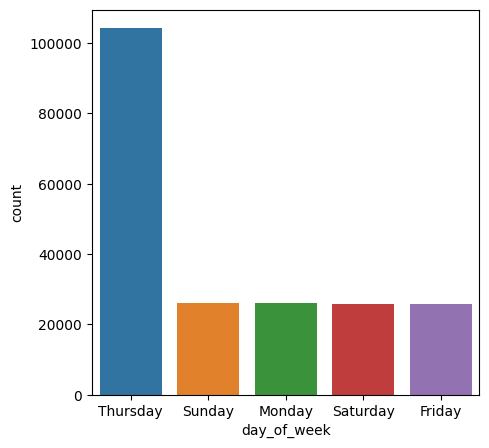

In [68]:
plt.figure(figsize=(5,5))
sns.barplot(data=day,x='day_of_week',y='count');

**Meses mas demandados**

In [69]:
# Analizamos que meses son los mas demandados
# Creamos una columna month para obtener el mes
flights_copy = df_flights
flights_copy['month'] = pd.to_datetime(df_flights['year-month-day']).dt.month
flights_copy["name_month"] =df_flights["year-month-day"].dt.month_name()
flights_copy
months = pd.DataFrame(flights_copy.groupby("name_month").size(),columns=['count']).sort_values(by="count",ascending=False)
months.reset_index(inplace=True)
months

,name_month,count
0,October,20893
1,January,19082
2,December,18813
3,November,18729
4,April,17634
5,March,16852
6,February,16771
7,July,16550
8,May,16542
9,September,16395


Observaciones: Octubre-Enero-Diciembre y Noviembre son los mas demandados.

Barplot

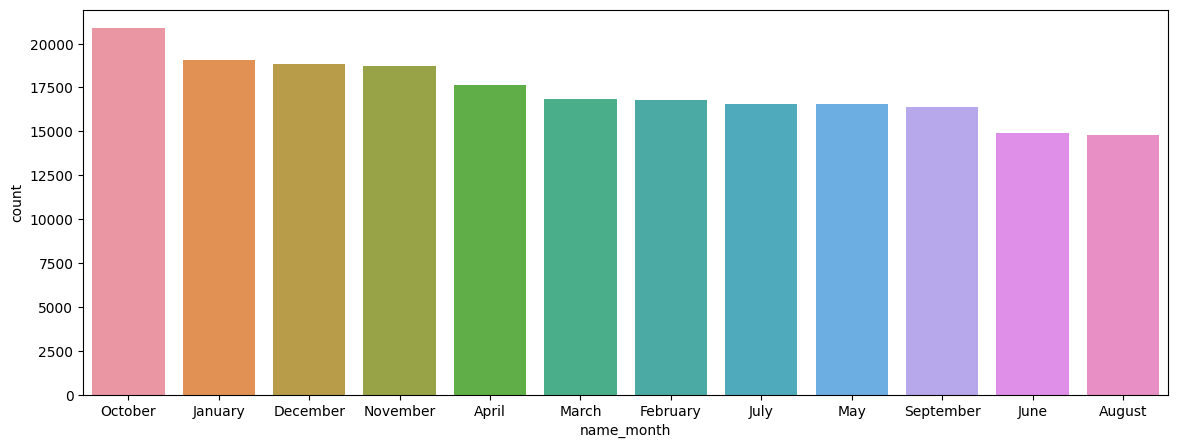

In [70]:
plt.figure(figsize=(14,5))
sns.barplot(data=months,x='name_month',y='count');

----

HOTELS

In [71]:
# Analizamos la cantidad de dias que los clientes viajan para identificar posibles preferencias
cant_dias = pd.DataFrame(df_hotels.groupby(['days']).size(),columns=['count']).sort_values(by="count",ascending=False)
cant_dias.reset_index(inplace=True)
cant_dias


,days,count
0,2,7805
1,1,7789
2,4,7770
3,3,7751


Barplot

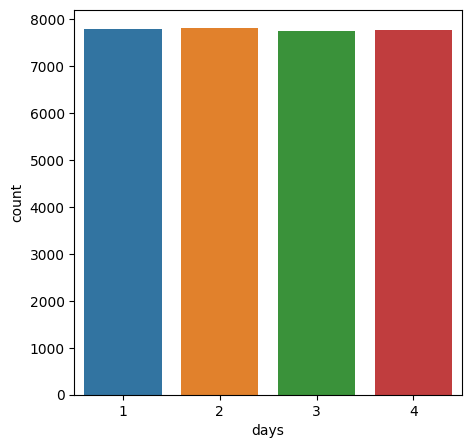

In [72]:
plt.figure(figsize=(5,5))
sns.barplot(data=cant_dias,x='days',y='count');

Barplot

In [73]:
pd.DataFrame(df_hotels.groupby('place').size())

,0
place,
Aracaju (SE),3155
Brasilia (DF),3409
Campo Grande (MS),3350
Florianopolis (SC),2552
Natal (RN),3676
Recife (PE),3467
Rio de Janeiro (RJ),3894
Salvador (BH),3866
Sao Paulo (SP),3746


In [74]:
# Analizamos la cantidad de dias x Ciudad
df1 = pd.DataFrame(df_hotels.groupby(['name', 'place','days']).size())
df1

0
name     place               days      
Hotel A  Florianopolis (SC)  1      654
                             2      648
                             3      602
                             4      648
Hotel AF Sao Paulo (SP)      1      931
                             2      889
                             3      972
                             4      954
Hotel AU Recife (PE)         1      815
                             2      919
                             3      876
                             4      857
Hotel BD Natal (RN)          1      957
                             2      887
                             3      884
                             4      948
Hotel BP Brasilia (DF)       1      847
                             2      894
                             3      834
                             4      834
Hotel BW Campo Grande (MS)   1      843
                             2      868
                             3      829
                             4      810
Hotel CB Rio de Janeiro (RJ) 1     1013
                             2      930
                             3      986
                             4      965
Hotel K  Salvador (BH)       1      943
                             2      960
                             3      981
                             4      982
Hotel Z  Aracaju (SE)        1      786
                             2      810
                             3      787
                             4      772

Boxplot

<Figure size 4000x1500 with 0 Axes>

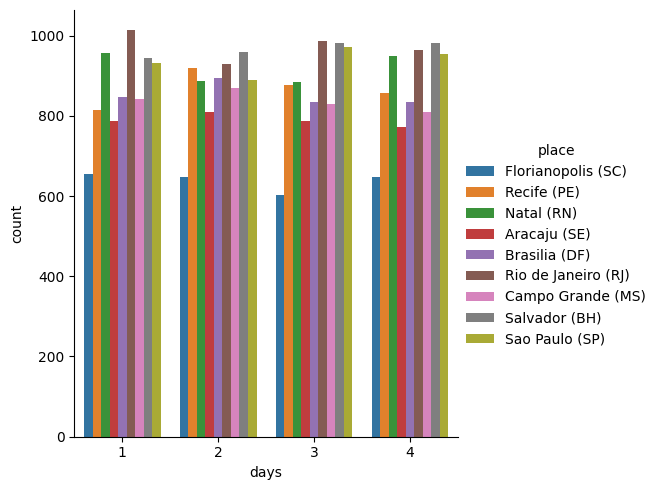

In [75]:
plt.figure(figsize=(40,15));
sns.catplot(x="days",
            hue="place",
            kind='count',
            data=df_hotels,
            ci=None); # Para que elimine las barras de error



Observaciones: No se encontro ninguna preferencia por la cantidad de dias que los clientes eligen viajar. No hay una tendencia por viajes cortos (1 dia) o viajes largos (>1 dia y <=4 dias)

In [76]:
# Destinos mas demandados (cada destino tiene un unico hotel)
df_hotels.groupby(['name', 'place']).size()

name      place              
Hotel A   Florianopolis (SC)     2552
Hotel AF  Sao Paulo (SP)         3746
Hotel AU  Recife (PE)            3467
Hotel BD  Natal (RN)             3676
Hotel BP  Brasilia (DF)          3409
Hotel BW  Campo Grande (MS)      3350
Hotel CB  Rio de Janeiro (RJ)    3894
Hotel K   Salvador (BH)          3866
Hotel Z   Aracaju (SE)           3155
dtype: int64

Barplot

Text(0.5, 0, 'Destinos')

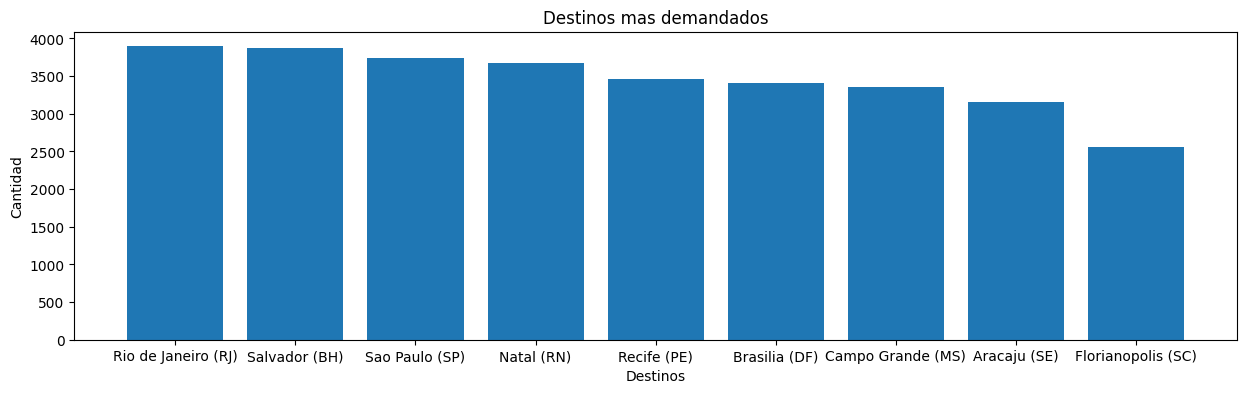

In [77]:
# Graficamos Destinos mas demandados
places=df_hotels['place'].value_counts()
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(x=places.index,height=places.values);
ax.set_title('Destinos mas demandados');
ax.set_ylabel('Cantidad')
ax.set_xlabel('Destinos')

----

USERS

In [78]:
# Company que mas clientes tiene
company = pd.DataFrame(df_users.groupby('company').size(),columns=['cantidad']).sort_values(by="cantidad",ascending=False)
company.reset_index(inplace=True)
company

,company,cantidad
0,4You,453
1,Acme Factory,261
2,Wonka Company,237
3,Monsters CYA,195
4,Umbrella LTDA,194


Barplot


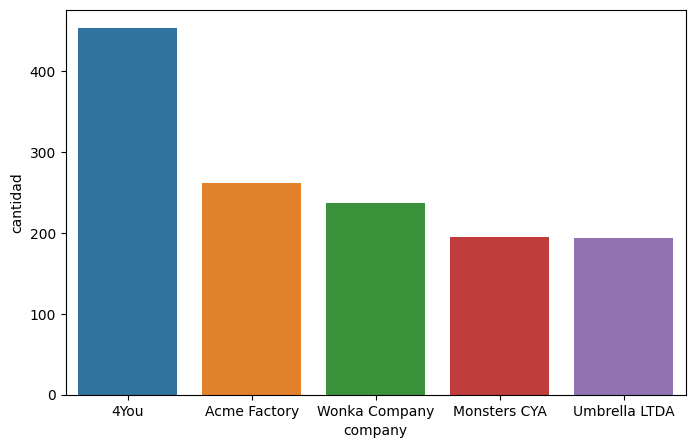

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(data=company,x='company',y='cantidad');

**Observaciones:** Encontramos que hay una inclinacion notable por la Compania 4You

Histograma

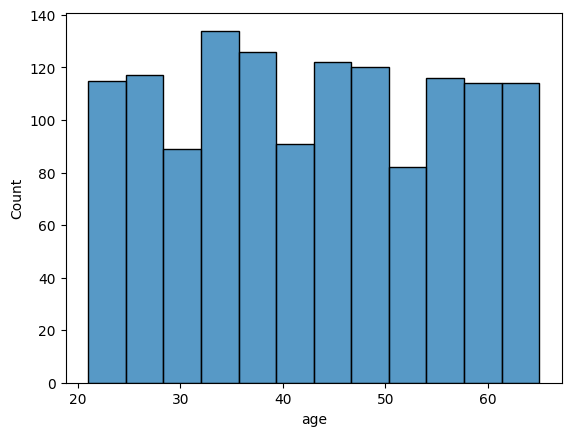

In [80]:
# Analizamos si hay una inclinacion por cierto rango de edad para realizar los viajes
sns.histplot(data=df_users, x='age');

In [81]:
# Que sexo es el que mas viaja
gender = pd.DataFrame(df_users.groupby('gender').size(),columns=['cantidad']).sort_values(by="cantidad",ascending=False)
#gender['%']=round(687*100/1340,2),round(653*100/1340,2)
gender.reset_index(inplace=True)
gender

,gender,cantidad
0,female,687
1,male,653


Barplot

<AxesSubplot: xlabel='gender', ylabel='cantidad'>

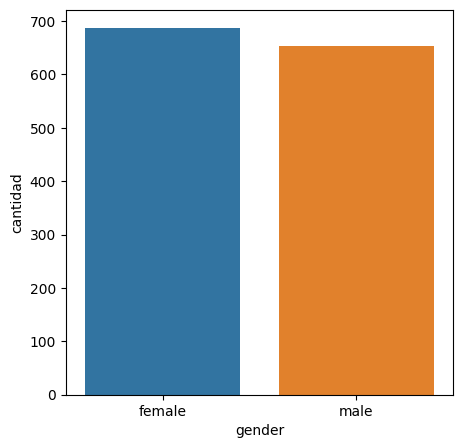

In [82]:
plt.figure(figsize=(5,5))
sns.barplot(data=gender,x='gender',y='cantidad')

Donut Chart

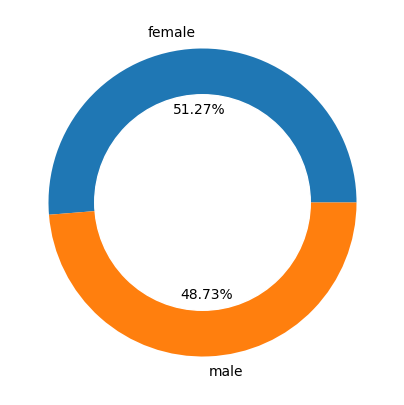

In [83]:
data = df_users["gender"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

plt.figure(figsize=(5,5))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')

p=plt.gcf()
p.gca().add_artist(my_circle);

Observaciones: no hay una tendencia por ningun genero en particular

**2. Análisis bivariante**

**H2) 1. Relacion de Ingresos por Vuelos-Ingresos por Hoteles**

**Ingresos x Vuelos**

In [84]:
# Ingresos por Vuelos x mes
ingresos_x_vuelos = df_flights.groupby('year-month')["price"].sum()
ingresos_x_vuelos

year-month
2019-09     2527121.67
2019-10    11114297.46
2019-11    10351126.08
2019-12    10131735.82
2020-01    10798562.51
2020-02     9451488.23
2020-03     9662571.90
2020-04     9834824.26
2020-05     9496125.07
2020-06     8689664.14
2020-07     9417373.98
2020-08     8671955.26
2020-09     7596417.35
2020-10     8694970.16
2020-11     7563801.36
2020-12     7822229.83
2021-01     7358723.19
2021-02     6566440.69
2021-03     6517067.26
2021-04     7002768.91
2021-05     6465842.08
2021-06     5631350.42
2021-07     6386656.95
2021-08     5495555.73
2021-09     5508702.70
Freq: M, Name: price, dtype: float64

<AxesSubplot: xlabel='year-month', ylabel='Suma Precio'>

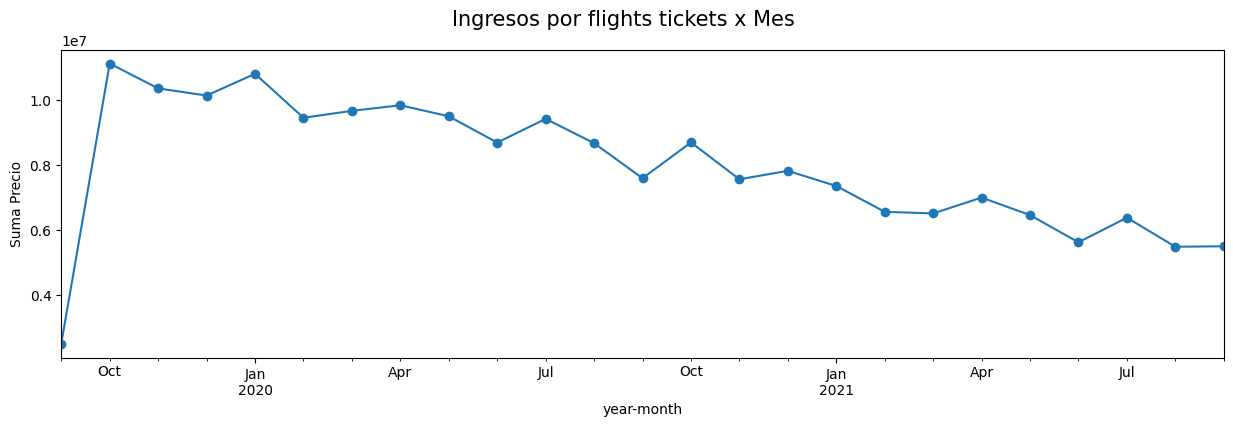

In [85]:
# Graficamos los ingresos por los vuelos x mes
fig, ax = plt.subplots(figsize=(15, 4))
fig.suptitle('Ingresos por flights tickets x Mes', fontsize = '15')
ax.set(xlabel='year-month', ylabel='Suma Precio')
ingresos_x_vuelos.plot(kind='line',marker='o')

**Ingresos x Hoteles**

In [86]:
# Ingresos por mes de todos los hoteles
ingresos_hoteles = df_hotels.groupby('year-month')["total"].sum()
ingresos_hoteles

year-month
2019-09     199758.19
2019-10    1070162.51
2019-11     780519.70
2019-12     808451.74
2020-01     967877.53
2020-02     775590.64
2020-03     744327.63
2020-04     897503.14
2020-05     711210.33
2020-06     711952.73
2020-07     820377.65
2020-08     705902.76
2020-09     612452.81
2020-10     754626.82
2020-11     600188.99
2020-12     748886.45
2021-01     567741.67
2021-02     552313.78
2021-03     526551.34
2021-04     638482.35
2021-05     485221.72
2021-06     457999.68
2021-07     565232.91
2021-08     436591.08
2021-09     519710.21
Freq: M, Name: total, dtype: float64

<AxesSubplot: xlabel='year-month', ylabel='Suma Precio'>

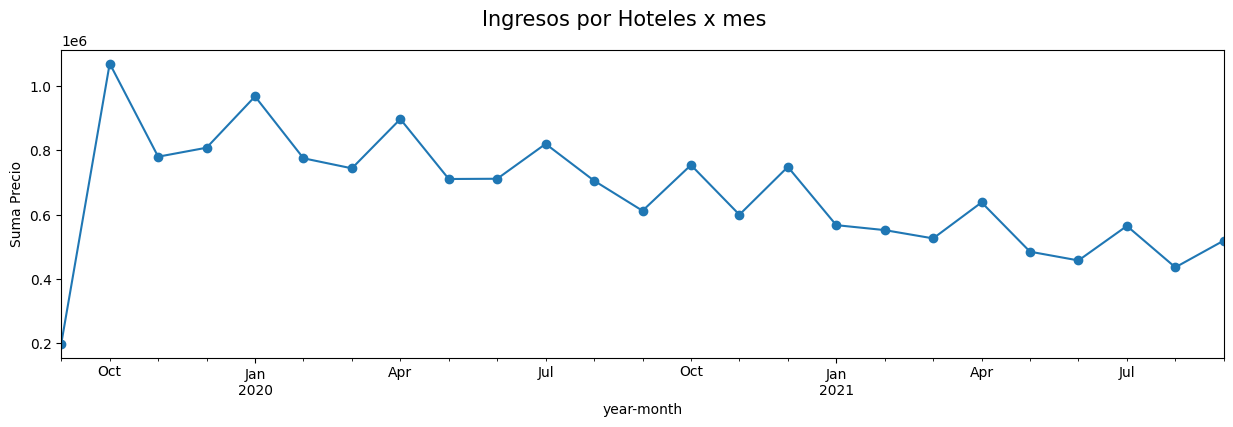

In [87]:
# Graficamos los ingresos por mes de todos los hoteles
fig, ax = plt.subplots(figsize=(15, 4))
fig.suptitle('Ingresos por Hoteles x mes', fontsize = '15')
ax.set(xlabel='year-month', ylabel='Suma Precio')
ingresos_hoteles.plot(kind='line',marker='o')

Observaciones: La suma de los ingresos por vuelos y por hoteles por mes decrece notablemente a partir de Octubre de 2019. 
Julio-Octubre-Diciembre-Enero son los meses donde hay mayor turismo por eso suben los ingresos debido a vuelos.
Se puede llegar a la conclusion de que la llegada de la pandemia por Covid-19 es una de las principales causas en el descenso de clientes y la caida de las companias de viajes.

**Ingresos por Vuelos-Ingresos por Hoteles**

In [88]:
# Unimos los datasets Flight y Hotels para analizar como se relacionan los ingresos de cada uno con respecto al otro

# 1° Filtramos por el rango de fecha que decidimos analizar
flights = df_flights.loc[(df_flights['year-month'] >= '2019-9') & (df_flights['year-month'] <= '2022-09')]
hotels = df_hotels.loc[(df_hotels['year-month'] >= '2019-9') & (df_hotels['year-month'] <= '2022-09')]
# 2° Sumamos todos los vuelos x mes
flights = flights.groupby('year-month')['price'].sum()
flights
hotels = hotels.groupby('year-month')['price'].sum()
hotels
# Unimos por fecha
flights_hotels = pd.merge(flights,hotels, on=['year-month'], how='left')

flights_hotels.reset_index(inplace=True)
flights_hotels.rename(columns={'price_x':'flight_price','price_y':'hotels_price'})
flights_hotels

,year-month,price_x,price_y
0,2019-09,2527121.67,83087.32
1,2019-10,11114297.46,424460.98
2,2019-11,10351126.08,311053.43
3,2019-12,10131735.82,321368.72
4,2020-01,10798562.51,387585.78
5,2020-02,9451488.23,312726.24
6,2020-03,9662571.90,297508.32
7,2020-04,9834824.26,361440.30
8,2020-05,9496125.07,283964.14
9,2020-06,8689664.14,286712.68


In [89]:
# Matriz de Correlacion 
flights_hotels.corr()

C:\Users\Santiago\AppData\Local\Temp\ipykernel_8460\1795952786.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights_hotels.corr()


,price_x,price_y
price_x,1.000000,0.953243
price_y,0.953243,1.000000


In [90]:
# Coeficiente de Correlacion 
np.corrcoef(hotels.values, flights.values)

array([[1.        , 0.95324301],
       [0.95324301, 1.        ]])

Observaciones: Como el r=0,95 -1<r<1 , existe una correlacion positiva, hay una alta relacion, es decir que ambas variables son dependientes, cuando una aumenta la otra tambien, y viceversa

Dispersion

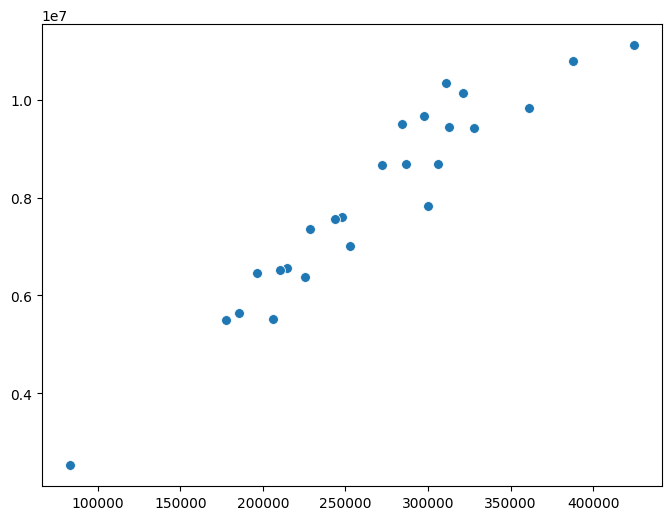

In [91]:
# Diagrama de dispersion
# Graficamente observamos la dependencia de las variables ['flight_price','hotels_price']
plt.figure(figsize=(8,6))
sns.scatterplot(x=hotels.values,
                y=flights.values,
               s=50);
#ajustar escala con log

**Ingresos por Vuelos y Hoteles x compania**

In [92]:
#1° Obtenemos de c dataframe las columnas que queremos
# Flights
vuelos = df_flights[['userCode','price','year-month','year']]

# Hotels
hoteles = df_hotels[['userCode','price','year-month','year']]

# Users
usuarios = df_users[['code','company']]
# Renombramos la columna user con userCode para poder hacer la union
usuarios = usuarios.rename(columns={'code': 'userCode'})

# Unimos vuelos_usuarios
vuelos_usuarios = pd.merge(vuelos,usuarios, on=['userCode'], how='left')
vuelos_usuarios

# Unimos hoteles_usuarios 
hoteles_usuarios = pd.merge(hoteles,usuarios, on=['userCode'], how='left')
hoteles_usuarios

,userCode,price,year-month,year,company
0,0,313.02,2019-09,2019,4You
1,844,312.83,2019-09,2019,Wonka Company
2,455,242.88,2019-09,2019,Monsters CYA
3,1082,208.04,2019-09,2019,Acme Factory
4,1084,312.83,2019-09,2019,Acme Factory
...,...,...,...,...,...
31110,1056,242.88,2021-09,2021,Acme Factory
31111,262,165.99,2021-09,2021,4You
31112,261,242.88,2021-09,2021,4You
31113,1066,165.99,2021-09,2021,Acme Factory


In [93]:
# Agrupamos por year-month y company los ingresos de vuelos
suma_precios_vuelos = pd.DataFrame(vuelos_usuarios.groupby(['year-month','company','year'])['price'].sum())
suma_precios_vuelos
suma_precios_vuelos.reset_index(inplace=True)
suma_precios_vuelos

,year-month,company,year,price
0,2019-09,4You,2019,841601.55
1,2019-09,Acme Factory,2019,541901.85
2,2019-09,Monsters CYA,2019,348364.97
3,2019-09,Umbrella LTDA,2019,404228.49
4,2019-09,Wonka Company,2019,391024.81
...,...,...,...,...
120,2021-09,4You,2021,1846176.18
121,2021-09,Acme Factory,2021,1077836.41
122,2021-09,Monsters CYA,2021,772119.48
123,2021-09,Umbrella LTDA,2021,954610.61


Lineplot

Text(0, 0.5, 'Ingresos por Vuelos')

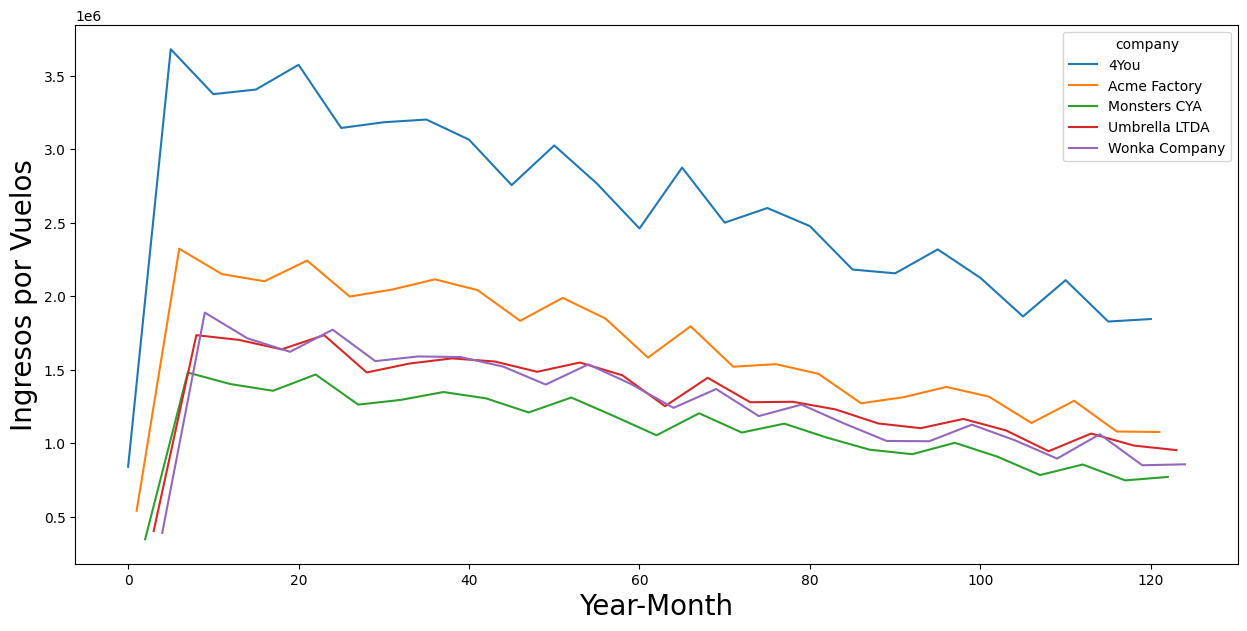

In [94]:
fig, axs = plt.subplots(figsize=(15,7))
sns.lineplot(data=suma_precios_vuelos,x=suma_precios_vuelos.index,y='price',hue='company');
axs.set_xlabel("Year-Month", fontsize = 20)
axs.set_ylabel("Ingresos por Vuelos", fontsize = 20)

In [95]:
# Agrupamos por year-month y company los ingresos de hoteles
suma_precios_hoteles = pd.DataFrame(hoteles_usuarios.groupby(['year-month','company'])['price'].sum())
suma_precios_hoteles
suma_precios_hoteles.reset_index(inplace=True)
suma_precios_hoteles

,year-month,company,price
0,2019-09,4You,28255.65
1,2019-09,Acme Factory,15834.10
2,2019-09,Monsters CYA,13756.91
3,2019-09,Umbrella LTDA,9804.79
4,2019-09,Wonka Company,15435.87
...,...,...,...
120,2021-09,4You,73300.76
121,2021-09,Acme Factory,37474.85
122,2021-09,Monsters CYA,31591.19
123,2021-09,Umbrella LTDA,31910.98


Lineplot

Text(0, 0.5, 'Ingresos por Hoteles')

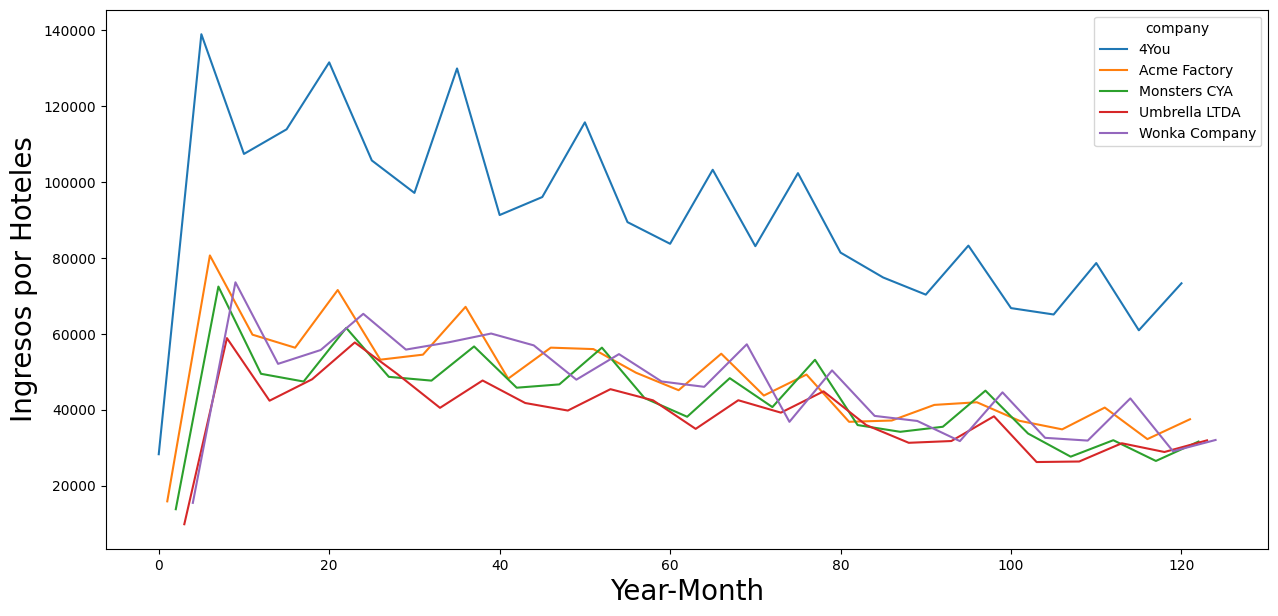

In [96]:
fig, axs = plt.subplots(figsize=(15,7))
sns.lineplot(data=suma_precios_hoteles,x=suma_precios_hoteles.index,y='price',hue='company');
axs.set_xlabel("Year-Month", fontsize = 20)
axs.set_ylabel("Ingresos por Hoteles", fontsize = 20)

**2. Relacion de Precios de Vuelos-Distancia**

In [97]:
# Filtramos por price y distance
price_distance = df_flights[['price','distance']]
price_distance

,price,distance
0,1434.38,676.53
204004,949.58,573.81
203676,898.67,937.77
203610,1582.10,808.85
203296,1315.27,709.37
...,...,...
215514,1087.18,637.56
130128,1473.41,650.10
117130,684.65,168.22
259738,949.58,573.81


In [98]:
# Coeficiente de Correlacion 
price_distance.corr()

,price,distance
price,1.000000,0.642858
distance,0.642858,1.000000


Observaciones: Como el r=0,64 -1<r<1 , existe una correlacion positiva, hay una alta relacion, es decir que ambas variables son dependientes, cuando una aumenta la otra tambien, y viceversa

Dispersion

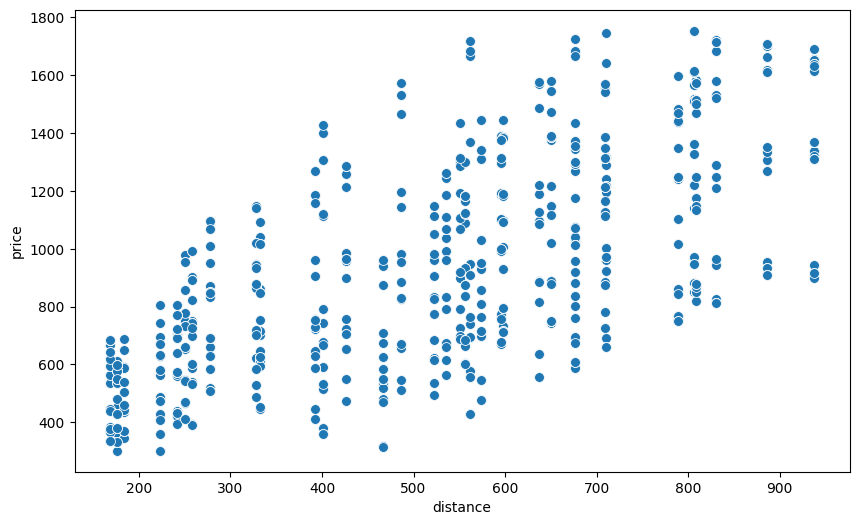

In [99]:
# Graficamos distance-price
plt.figure(figsize=(10,6))
sns.scatterplot(data=price_distance,
            x='distance',
            y='price',
            s=50);

### 5. Resultados
* En Brasil la temporada alta de turismo se centra en los meses de Julio-Diciembre y Enero, lo cuáles según el análisis obtenido coinciden con los más demandados por los clientes para viajar.<br>
* Los jueves es el día de mayor demanda (50,15%). En general, de Lunes a Viernes los costos de vuelos son menores Viernes-Sábado-Domingos aumentan.<br>
* Las empresas consideran que la calidad de los viajes aumenta la satisfacción y la productividad de los viajeros lo que implica mejores comodidades en las clases de vuelo, es por eso que eligen viajar en FirstClass (42,69%).<br>
* Los mayores y más importantes centros de negocios de Brasil son las megaciudades de Sao Paulo y Río de Janeiro. Más allá, la mayoría de las capitales de los estados cumplen plenamente su papel de otros centros económicos principales del país: Belo Horizonte, Salvador, Recife, Fortaleza, Curitiba y Porto Alegre. Estas son las ciudades que dominan el desarrollo económico de Brasil.<br>
* No se encontró preferencia por una determinada cantidad de días, por lo general los viajes tienen una duración de entre 1-4 días, lo cual puede deberse a que depende el tipo de viaje que realicen los clientes, ya sea para asistir a congresos, conferencias, capacitaciones o reuniones de negocios.<br>
* Aceptamos la hipótesis de la depencia de que el aumento/disminución en la compra de vuelos implica  aumento/disminución en la reserva de hoteles.<br> 
* Aceptamos la hipótesis de que la distancia influye notablemente en el precio de los vuelos (proporcionales). 
